# Scientific analysis of vehicle efficiency and performance across models

##### Ever wondered if certain relationships exist between the efficiency and performance across a wide range of vehicle models?<br>No?<br>Well you're in luck, because i've got the answer you didnt know you needed!
###### (or wanted)

In [38]:
# Our beloved imports
import numpy as np
import statsmodels.stats.weightstats as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid") # Spicy!

In [39]:
# Load the data and remove all nans
cars = pd.read_csv('cars.csv')
cars = cars.dropna()
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Mpg vs horsepower & acceleration

##### Surely, the average lead guzzler ought to have terrible efficiency in comparison to a small & compact, right?<br>I figured the same. But let's see what the data actually ses.

##### We'll start off by taking a look at mpg vs horsepower and acceleration respectively. As we can see in the first graph, showing mpg vs horsepower, the higher the horsepower the generally lower efficiency you get. Now this might not be completely indicative of our assumptions, but it's still reasonably clear even from the second graph comparing acceleration vs mpg, that there indeed seems to be a sweet spot between the metrics, with deviations resulting in lower/higher efficiency. We also see a strong correlation between cylinder count and efficiency, with a lower count again resulting in generally higher efficiency, and vice versa.

##### Interestingly, the mean & median lines also roughly line up with the cylinder count responsible for achieving the best of both worlds across the various specs.

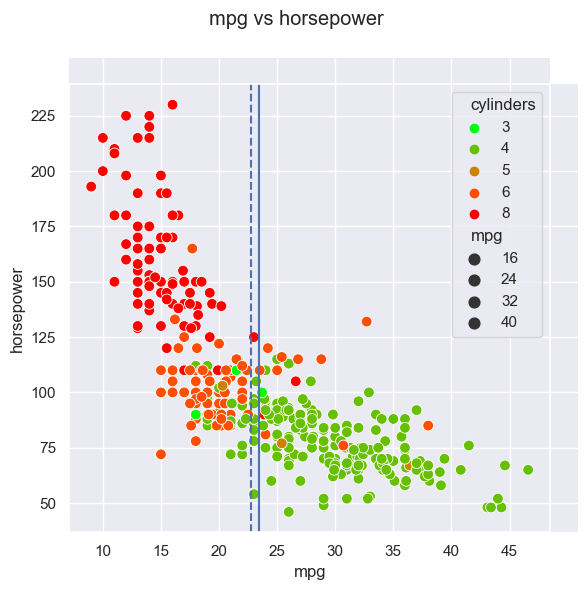

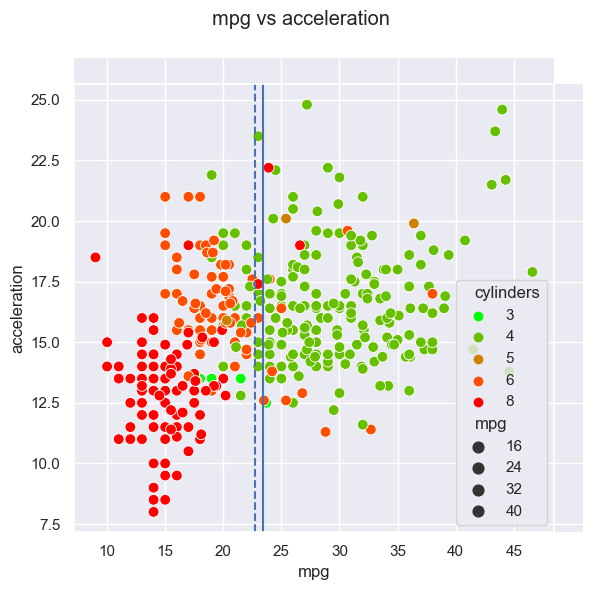

In [40]:
# Get the mean and median
mpg_mean = round(cars.loc[:, 'mpg'].mean(), ndigits=2)
mpg_median = round(cars.loc[:, 'mpg'].median(), ndigits=2)

metrics = ['horsepower', 'acceleration']

# loop over and create two graphs comparing mpg vs horsepower and acceleration respectively
for metric in metrics:
    
    # Use JointGrid for a custom plot
    jg = sns.JointGrid(
        data=cars,
        x="mpg",
        y=metric,
        space=0,
        ratio=17,
        hue='cylinders', # Set hue to show cylinder count
        palette=sns.color_palette(
            "blend:#00FF00,#FF6200,#FF0000", as_cmap=True) # Color me impressed!
    )
    
    # use plot_join to get custom scatterplot
    jg.plot_joint(
        sns.scatterplot,
        size=cars["mpg"], # mandatory, but not in use
        sizes=(60, 60), # all sizes are the same
        legend=True
    )
    
    # Add two lines showing mean and mediam mpg
    jg.ax_joint.axvline(x=mpg_mean)
    jg.ax_joint.axvline(x=mpg_median, linestyle='--')
    
    # Add a title and adjust the spacing a bit
    jg.fig.suptitle(f"mpg vs {metric}")
    jg.fig.subplots_adjust(top=0.90)


##### In fact, lets take a closer look at the cylinder count using a different graph. The following graphs highlights the relationship between the cylinder count and mpg & performance. While the data does present some uncertainty (as seen in the graph), it again shows a clear sweet spot for the number of cylinders (and thereby performance) and mpg, further strengthening our initial assumptions. As expected, the horsepower is also highly proportional to cylinder count.

[Text(0.5, 1.0, 'mpg vs horsepower')]

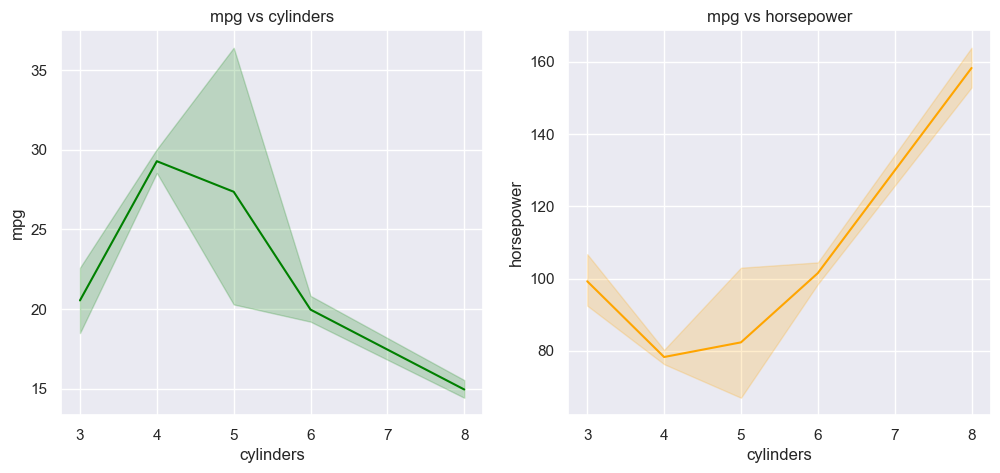

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create a lineplot of mpg vs cylinders
sns.lineplot(
    ax=axes[0],
    data=cars,
    x="cylinders",
    y="mpg",
    color='green' # what can i say.. i like colorful stuff!
).set(title="mpg vs cylinders")

# Create a lineplot of mpg vs horsepower
sns.lineplot(
    ax=axes[1],
    data=cars,
    x="cylinders",
    y="horsepower",
    color='orange'  # what can i say.. i like colorful stuff!
).set(title="mpg vs horsepower")

##### Thus far we've really only been looking at numbers pertaining to the global automotive industry. Let's now take a quick look at the American and European sectors as well. The following graph shows the mpg count (e.g each data-points mpg) and mean mpg for the two continents.
##### The numbers dont lie. The mean mpg of European vehicles is simply higher.<br>uppon first glace, it sure does look like Americans just love burning hydrocarbons. But don't be fooled, as this discrepancy could also be a function of various other externalities between the continents. Externalities such as weather, average elevation change, average cargo weight.. etc. One cannot simply draw a clear cut conclusion as to why the consumption is far higher on one continent than the other, even though the preliminary analysis might entice you to do so.

Mean mpg
US: 20.03
EU: 27.6


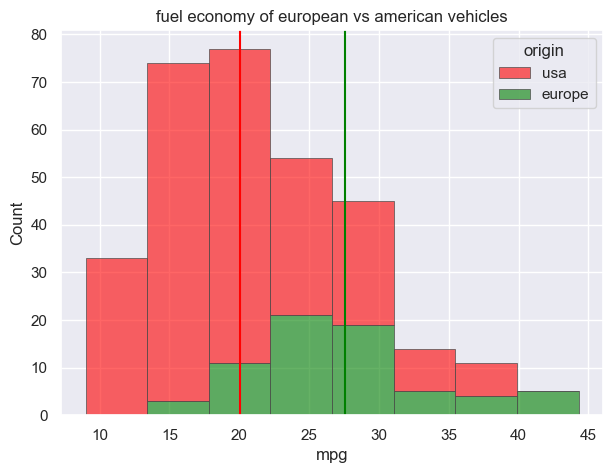

In [42]:
# Drop all japanese models, as we're only interested in european & american models
cars_minus_japan = cars.drop(cars[cars['origin'] == 'japan'].index)

# create a stacked histplot showing the mpg of US and european cars
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    data=cars_minus_japan,
    x="mpg",
    hue="origin",
    bins=8,
    multiple="stack",
    palette=["red", "green"],
    edgecolor=".3",
    linewidth=.5,
    alpha=0.6
)

# Calculate mean mpg for US and EU
us_mean = round(cars_minus_japan[cars_minus_japan["origin"] == "usa"]["mpg"].mean(), ndigits=2)
eu_mean = round(cars_minus_japan[cars_minus_japan["origin"] == "europe"]["mpg"].mean(), ndigits=2)

# Add two lines showing mean mpg for US and EU
ax.axvline(x=us_mean, color='red')
ax.axvline(x=eu_mean, color='green')

ax.set_title("fuel economy of european vs american vehicles")

print(f"Mean mpg\nUS: {us_mean}\nEU: {eu_mean}")

##### Another rather surprising data point is presented when you compare the two continents mpg standard deviation. Even though the US is known for it's big & heavy freedom trucks, the actual mpg deviance appears to be negligible.<br>Who would've thought.

In [43]:
# Calculate mpg standard deviation for US and EU
us_std = round(cars_minus_japan[cars_minus_japan["origin"] == "usa"]["mpg"].std(), ndigits=2)
eu_std = round(cars_minus_japan[cars_minus_japan["origin"] == "europe"]["mpg"].std(), ndigits=2)

print("Standard deviation of US and EU vehicle mpg")
print(f"US: {us_std}")
print(f"EU: {eu_std}")

Standard deviation of US and EU vehicle mpg
US: 6.44
EU: 6.58


##### And while were here, we might as well take a quick peek at the mean and median values as well ;)

In [44]:
print("Mean")
print(f"Mpg: {mpg_mean}\n")

print("Median")
print(f"Mpg: {mpg_median}")

Mean
Mpg: 23.45

Median
Mpg: 22.75


##### Possibly one of the most important statistical metrics to take into account is the confidence interval, which can be used to accurately gauge the expected variation for our measurements with a given confidence (in this case 95%). This helps us rule out the possibility of our sample data containing extreme edge caseses that would otherwise skew our population estimates.

##### In this case, were looking at the confidence interval between the mpg and horsepower of 4 and 8 cylinder vehicles. And i'd say the results are pretty reasonable, as we can, with 95% confidence draw logical conclusions using the data.

In [45]:
metrics = ['mpg', 'horsepower']

# loop through and calculate the confidence interval for mpg and horsepower between 4 and 8 cylinder cars
for metric in metrics:

    # Get all the cars with 4 and 8 cylinders respectively
    cars_4c = cars.loc[cars['cylinders'] == 4][metric]
    cars_8c = cars.loc[cars['cylinders'] == 8][metric]

    # Get the central tendancy for each cylinder category
    cars_4c_tendancy = sm.DescrStatsW(data=cars_4c)
    cars_8c_tendancy = sm.DescrStatsW(data=cars_8c)

    # calculate the confidenve interval
    confidence_interval = sm.CompareMeans(
        d1=cars_4c_tendancy, d2=cars_8c_tendancy).tconfint_diff(alpha=0.05)
    
    # print each one out
    print(f'confidence interval for {metric}')
    print(f"{round(confidence_interval[0], 2)} - {round(confidence_interval[1], 2)}\n")

confidence interval for mpg
13.15 - 15.49

confidence interval for horsepower
-84.88 - -75.16



### Conclusion

##### In this report, we've taken a scientific and statistical approach to analyzing and drawing resonable conclusions from a dataset containing various vehicle models. We've looked at key metrics such as (amongst others) mpg vs horsepower, mpg vs acceleration, cylinder count vs mpg and cylinders vs horsepower. We also took a look at the various mean and median values as well as the standard deviation. Finally, we encorporated a confidence interval test in order to minimize our biases and strengthen our assumptions.

##### After analying the data carefully, we came to the logical conclusion that there indeed does exist a coorelation between performance and efficiency, as well as American vs European vehicle models.

<br>

###### The end.<br>*Fin.*